In [1]:
import pandas as pd
import gdown
import os
import sys
import shutil
import zipfile
from matplotlib import pyplot as plt

sys.path.insert(1, os.path.join(os.path.dirname(os.getcwd()), "scripts") )

from statistical_tests import explore_timeseries
from utils import plot_time_series


In [2]:
root_path = os.path.dirname(os.getcwd())
data_root_path = os.path.join(root_path, "data")
data_path = os.path.join(data_root_path, "forecasting")


In [3]:
os.makedirs(data_root_path, exist_ok=True)

Download the raw data

In [4]:
# Download the data from the Library TFB
file_id = "1vgpOmAygokoUt235piWKUjfwao6KwLv7"
url = f"https://drive.google.com/uc?id={file_id}"
output_file= os.path.join(data_root_path, "data.zip")

gdown.download(url, output_file, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1vgpOmAygokoUt235piWKUjfwao6KwLv7
From (redirected): https://drive.google.com/uc?id=1vgpOmAygokoUt235piWKUjfwao6KwLv7&confirm=t&uuid=ab91c911-0f32-4346-803a-2d3b8c09501c
To: /Users/anamabo/Documents/medium-blogs/moirai-moe/data/data.zip
100%|██████████| 381M/381M [00:31<00:00, 12.2MB/s] 


'/Users/anamabo/Documents/medium-blogs/moirai-moe/data/data.zip'

Unzip the data and remove zip files and other folders

In [5]:
with zipfile.ZipFile(output_file, 'r') as zip_ref:
    zip_ref.extractall(data_root_path)

os.remove(output_file)

if os.path.exists(os.path.join(data_root_path, "__MACOSX")):
    shutil.rmtree(os.path.join(data_root_path, "__MACOSX"))

We selected the time series manually. We took the following criteria into account:
* Time stamp as index
* Already cleaned data
* more than one year of data

Now we'll explore the shape of the time series.

Data1 - Bitcoin price 

In [6]:
filename = "bitcoin_dataset_without_missing_values_1.csv"

# read filename with date column as datetype
df = pd.read_csv(os.path.join(data_path, filename), parse_dates=["date"])
df = df.drop("cols", axis=1)
df.rename(columns={"data": "target"}, inplace=True)
print(df.head())


        date  target
0 2009-01-03     1.0
1 2009-01-04     1.0
2 2009-01-05     1.0
3 2009-01-06     1.0
4 2009-01-07     1.0


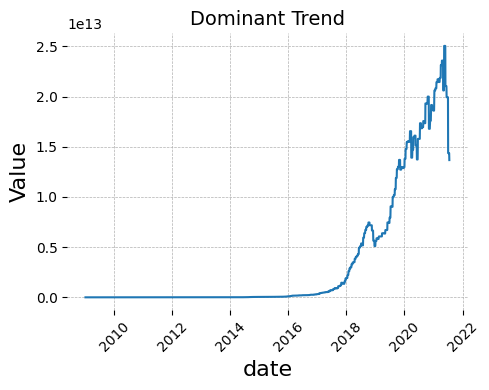

In [7]:
figure = plot_time_series(df, title="Dominant Trend", figsize=(5, 4))
plt.show()

Decomposition:


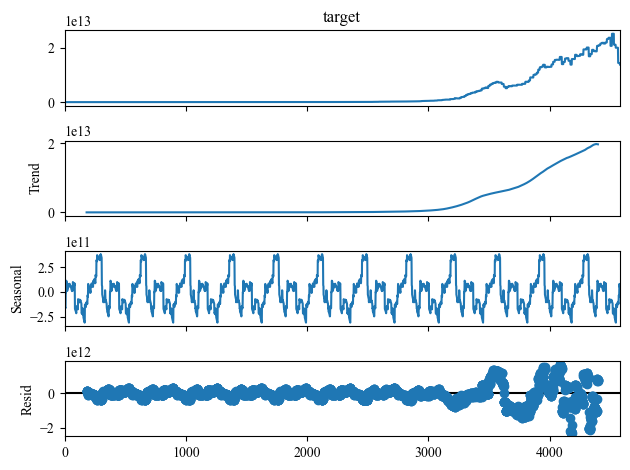

Auto correlation test:
Reject H0, thus the data is correlated. Ljung-Box statistic: 1110552.0877242691, p-value: 0.0
Stationarity test:
Accept H0, thus the data is not stationary. ADF statistic: -0.04095804348673038, p-value: 0.9550109450233186


In [8]:
explore_timeseries(df, ycolname="target", period=365, model="additive")

In [9]:
df.to_csv(os.path.join(root_path, "data", "dataset1.csv"), index=False)

data2 - Covid-19 cases

In [10]:
filename = "Covid-19.csv"
df1 = pd.read_csv(os.path.join(data_path, filename), parse_dates=["date"], sep=",")
df1[['country', 'case_type']] = df1["cols"].str.split(";", expand=True)

filtered_df = df1[(df1["country"]== "Austria") & (df1["case_type"]== "New_cases")].copy()
filtered_df = filtered_df.reset_index().drop(["index", "cols", "country", "case_type"], axis=1)
filtered_df.rename(columns={"data": "target"}, inplace=True)

print(filtered_df.head())


        date  target
0 2020-01-03       0
1 2020-01-04       0
2 2020-01-05       0
3 2020-01-06       0
4 2020-01-07       0


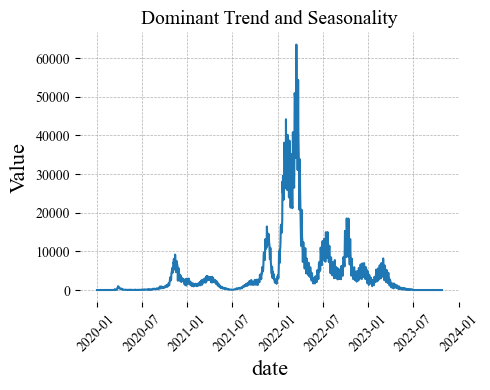

In [11]:
figure1 = plot_time_series(filtered_df, title="Dominant Trend and Seasonality", figsize=(5, 4))

Decomposition:


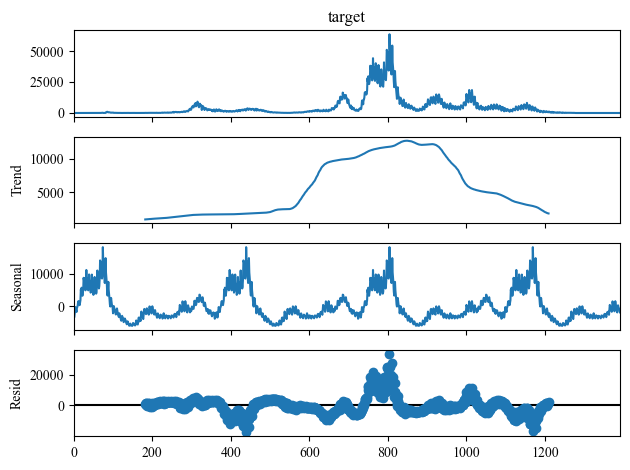

Auto correlation test:
Reject H0, thus the data is correlated. Ljung-Box statistic: 43055.49049870541, p-value: 0.0
Stationarity test:
Accept H0, thus the data is not stationary. ADF statistic: -2.599641755164321, p-value: 0.09307133196838202


In [12]:
explore_timeseries(filtered_df, ycolname="target", period=365, model="additive")


In [13]:
filtered_df.to_csv(os.path.join(root_path, "data", "dataset2.csv"), index=False)

data3 - Electricity

In [14]:
filename = "Electricity.csv"
df2 = pd.read_csv(os.path.join(data_path, filename), parse_dates=["date"])
df2 = df2.drop("cols", axis=1)
df2. rename(columns={"data": "target"}, inplace=True)

daily = df2.groupby(df2.date.dt.date)["target"].sum().reset_index()

print(daily.head())

#daily.plot(kind="line", x="date", y="electricity")


         date      target
0  2012-01-01  12275144.0
1  2012-01-02  18225876.0
2  2012-01-03  18244919.0
3  2012-01-04  18311261.0
4  2012-01-05  18362412.0


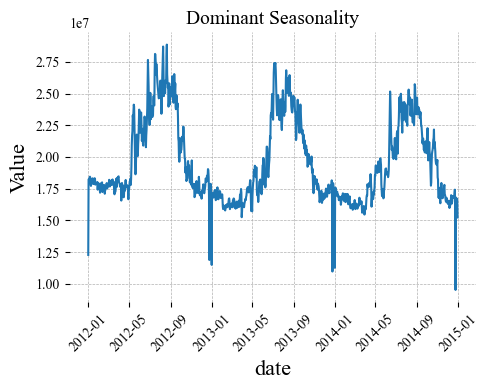

In [15]:
figure2 = plot_time_series(daily, title="Dominant Seasonality", figsize=(5, 4))

Decomposition:


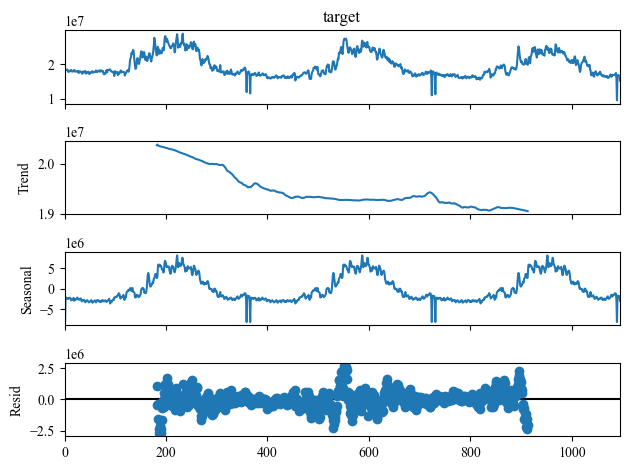

Auto correlation test:
Reject H0, thus the data is correlated. Ljung-Box statistic: 96434.56482155246, p-value: 0.0
Stationarity test:
Accept H0, thus the data is not stationary. ADF statistic: -2.0378007969932925, p-value: 0.2702485570829527


In [16]:
explore_timeseries(daily, ycolname="target", period=365, model="additive")

In [17]:
daily.to_csv(os.path.join(root_path, "data", "dataset3.csv"), index=False)